<a href="https://colab.research.google.com/github/K-107/exercise/blob/main/Informer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informer Demo

## Download code and dataset

In [1]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 538 (delta 0), reused 0 (delta 0), pack-reused 535
Receiving objects: 100% (538/538), 6.48 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (306/306), done.
Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 187 (delta 66), reused 13 (delta 2), pack-reused 0
Receiving objects: 100% (187/187), 3.85 MiB | 10.84 MiB/s, done.
Resolving deltas: 100% (66/66), done.
ETDataset  Informer2020  sample_data


In [2]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [3]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 'Informer2020']

In [4]:
!pwd

/content


In [5]:
!ls

ETDataset  Informer2020  sample_data


In [6]:
!pip install -r ./Informer2020/requirements.txt

     |████████████████████████████████| 13.1 MB 6.9 kB/s 
     |████████████████████████████████| 14.5 MB 75 kB/s 
     |████████████████████████████████| 10.4 MB 28.2 MB/s 
     |████████████████████████████████| 6.7 MB 44.2 MB/s 
     |████████████████████████████████| 735.5 MB 11 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found

## Prediction

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!pwd

/content


In [23]:
import os

# set saved model path
setting = 'informer_custom_ftMS_sl80_ll40_pl20_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
# path = os.path.join(args.checkpoints,setting,'checkpoint.pth')

### More details about Prediction - prediction dataset

You can give a `root_path` and `data_path` of the data you want to forecast, and set `seq_len`, `label_len`, `pred_len` and other arguments as other Dataset. The difference is that you can set a more detailed freq such as `15min` or `3h` to generate the timestamp of prediction series.

`Dataset_Pred` only has one sample (including `encoder_input: [1, seq_len, dim]`, `decoder_token: [1, label_len, dim]`, `encoder_input_timestamp: [1, seq_len, date_dim]`, `decoder_input_timstamp: [1, label_len+pred_len, date_dim]`). It will intercept the last sequence of the given data (seq_len data) to forecast the unseen future sequence (pred_len data).

# 예측!

In [45]:
from data.data_loader import Dataset_Custom
from torch.utils.data import DataLoader
import pandas as pd
import os

args.root_path = '/content/drive/MyDrive/Ventilator_Pressure_Prediction/'
args.data_path = 'sample_test.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [46]:
print(df)

                        date  breath_id   R  ...       u_in  u_out  pressure
0        1970-01-01 09:00:00          0   5  ...   0.000000      0         0
1        1970-01-01 09:00:01          0   5  ...   7.515046      0         0
2        1970-01-01 09:00:02          0   5  ...  14.651675      0         0
3        1970-01-01 09:00:03          0   5  ...  21.230610      0         0
4        1970-01-01 09:00:04          0   5  ...  26.320956      0         0
...                      ...        ...  ..  ...        ...    ...       ...
4023995  1970-02-16 22:46:35     125748  20  ...   4.971245      1         0
4023996  1970-02-16 22:46:36     125748  20  ...   4.975709      1         0
4023997  1970-02-16 22:46:37     125748  20  ...   4.979468      1         0
4023998  1970-02-16 22:46:38     125748  20  ...   4.982648      1         0
4023999  1970-02-16 22:46:39     125748  20  ...   4.985373      1         0

[4024000 rows x 8 columns]


In [47]:
df.drop('date',axis=1,inplace=True)
print(df)

         breath_id   R   C  time_step       u_in  u_out  pressure
0                0   5  20   0.000000   0.000000      0         0
1                0   5  20   0.031904   7.515046      0         0
2                0   5  20   0.063827  14.651675      0         0
3                0   5  20   0.095751  21.230610      0         0
4                0   5  20   0.127644  26.320956      0         0
...            ...  ..  ..        ...        ...    ...       ...
4023995     125748  20  10   2.530117   4.971245      1         0
4023996     125748  20  10   2.563853   4.975709      1         0
4023997     125748  20  10   2.597475   4.979468      1         0
4023998     125748  20  10   2.631134   4.982648      1         0
4023999     125748  20  10   2.665301   4.985373      1         0

[4024000 rows x 7 columns]


In [48]:
df = df.reset_index().rename(columns={'index':'date'})
print(df)

            date  breath_id   R   C  time_step       u_in  u_out  pressure
0              0          0   5  20   0.000000   0.000000      0         0
1              1          0   5  20   0.031904   7.515046      0         0
2              2          0   5  20   0.063827  14.651675      0         0
3              3          0   5  20   0.095751  21.230610      0         0
4              4          0   5  20   0.127644  26.320956      0         0
...          ...        ...  ..  ..        ...        ...    ...       ...
4023995  4023995     125748  20  10   2.530117   4.971245      1         0
4023996  4023996     125748  20  10   2.563853   4.975709      1         0
4023997  4023997     125748  20  10   2.597475   4.979468      1         0
4023998  4023998     125748  20  10   2.631134   4.982648      1         0
4023999  4023999     125748  20  10   2.665301   4.985373      1         0

[4024000 rows x 8 columns]


In [49]:
def value_plus(value):
    value_plus = value+7036000
    return value_plus

df.date = df.date.apply(lambda x: value_plus(x))
print(df)

             date  breath_id   R   C  time_step       u_in  u_out  pressure
0         7036000          0   5  20   0.000000   0.000000      0         0
1         7036001          0   5  20   0.031904   7.515046      0         0
2         7036002          0   5  20   0.063827  14.651675      0         0
3         7036003          0   5  20   0.095751  21.230610      0         0
4         7036004          0   5  20   0.127644  26.320956      0         0
...           ...        ...  ..  ..        ...        ...    ...       ...
4023995  11059995     125748  20  10   2.530117   4.971245      1         0
4023996  11059996     125748  20  10   2.563853   4.975709      1         0
4023997  11059997     125748  20  10   2.597475   4.979468      1         0
4023998  11059998     125748  20  10   2.631134   4.982648      1         0
4023999  11059999     125748  20  10   2.665301   4.985373      1         0

[4024000 rows x 8 columns]


In [50]:
import datetime

def change_index_to_date(value):
    date = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
    return date

df.date = df.date.apply(lambda x: change_index_to_date(x))
print(df)

                        date  breath_id   R  ...       u_in  u_out  pressure
0        1970-03-23 10:26:40          0   5  ...   0.000000      0         0
1        1970-03-23 10:26:41          0   5  ...   7.515046      0         0
2        1970-03-23 10:26:42          0   5  ...  14.651675      0         0
3        1970-03-23 10:26:43          0   5  ...  21.230610      0         0
4        1970-03-23 10:26:44          0   5  ...  26.320956      0         0
...                      ...        ...  ..  ...        ...    ...       ...
4023995  1970-05-09 00:13:15     125748  20  ...   4.971245      1         0
4023996  1970-05-09 00:13:16     125748  20  ...   4.975709      1         0
4023997  1970-05-09 00:13:17     125748  20  ...   4.979468      1         0
4023998  1970-05-09 00:13:18     125748  20  ...   4.982648      1         0
4023999  1970-05-09 00:13:19     125748  20  ...   4.985373      1         0

[4024000 rows x 8 columns]


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024000 entries, 0 to 4023999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 245.6+ MB


In [54]:
!pip uninstall pandas
!pip install pandas==1.1.5

Found existing installation: pandas 1.2.2
Uninstalling pandas-1.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.2.2
     |████████████████████████████████| 9.5 MB 5.1 MB/s 


In [55]:
df.to_csv('/content/ETDataset/ETT-small/test.csv', index=False)
pd.read_csv('/content/ETDataset/ETT-small/test.csv')

,date,breath_id,R,C,time_step,u_in,u_out,pressure
0,1970-03-23 10:26:40,0,5,20,0.000000,0.000000,0,0
1,1970-03-23 10:26:41,0,5,20,0.031904,7.515046,0,0
2,1970-03-23 10:26:42,0,5,20,0.063827,14.651675,0,0
3,1970-03-23 10:26:43,0,5,20,0.095751,21.230610,0,0
4,1970-03-23 10:26:44,0,5,20,0.127644,26.320956,0,0
...,...,...,...,...,...,...,...,...
4023995,1970-05-09 00:13:15,125748,20,10,2.530117,4.971245,1,0
4023996,1970-05-09 00:13:16,125748,20,10,2.563853,4.975709,1,0
4023997,1970-05-09 00:13:17,125748,20,10,2.597475,4.979468,1,0
4023998,1970-05-09 00:13:18,125748,20,10,2.631134,4.982648,1,0


In [59]:
!pwd

/content


In [384]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # data
args.root_path = '/content/ETDataset/ETT-small/' # root path of data file
args.data_path = 'test.csv' # data file
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'pressure' # target feature in S or MS task
args.freq = 's' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = '/content/drive/MyDrive/Ventilator_Pressure_Prediction/informer_checkpoints' # location of model checkpoints

args.seq_len = 80 # input sequence length of Informer encoder, 한 breath_id마다 80개의 데이터라서
args.label_len = 40 # start token length of Informer decoder, 예제 코드보니까 seq_len의 반이라서...
args.pred_len = 20 # prediction sequence length, 이건 또 label_len의 반이라서...
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 1 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 's' # 오잉 왜 h로 돼있었지??

args.batch_size = 1024
args.learning_rate = 0.0001
args.loss = 'mae'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 5
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = True
args.devices = '0'


In [385]:
args

{'activation': 'gelu',
 'attn': 'prob',
 'batch_size': 1024,
 'c_out': 1,
 'checkpoints': '/content/drive/MyDrive/Ventilator_Pressure_Prediction/informer_checkpoints',
 'd_ff': 2048,
 'd_layers': 1,
 'd_model': 512,
 'data': 'custom',
 'data_path': 'test.csv',
 'dec_in': 7,
 'des': 'exp',
 'devices': '0',
 'distil': True,
 'dropout': 0.05,
 'e_layers': 2,
 'embed': 'timeF',
 'enc_in': 7,
 'factor': 5,
 'features': 'MS',
 'freq': 's',
 'gpu': 0,
 'itr': 1,
 'label_len': 40,
 'learning_rate': 0.0001,
 'loss': 'mae',
 'lradj': 'type1',
 'mix': True,
 'model': 'informer',
 'n_heads': 8,
 'num_workers': 0,
 'output_attention': False,
 'padding': 0,
 'patience': 3,
 'pred_len': 20,
 'root_path': '/content/ETDataset/ETT-small/',
 'seq_len': 80,
 'target': 'pressure',
 'train_epochs': 5,
 'use_amp': False,
 'use_gpu': True,
 'use_multi_gpu': True}

In [386]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [387]:
# Set augments by using data name
data_parser = {
    'custom':{'data':'test.csv','T':'pressure','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [388]:
data_info

{'M': [7, 7, 7],
 'MS': [7, 7, 1],
 'S': [1, 1, 1],
 'T': 'pressure',
 'data': 'test.csv'}

In [389]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [391]:
from utils.tools import StandardScaler
from utils.timefeatures import time_features
from torch.utils.data import Dataset
class Dataset_Pred(Dataset):
    def __init__(self, root_path, flag='pred', size=None, 
                 features='MS', data_path='sample_train.csv', 
                 target='pressure', scale=True, inverse=False, timeenc=0, freq='s', cols=None):
        # size [seq_len, label_len, pred_len]
        # info
        if size == None:
            self.seq_len = 24*4*4
            self.label_len = 24*4
            self.pred_len = 24*4
        else:
            self.seq_len = size[0]
            self.label_len = size[1]
            self.pred_len = size[2]
        # init
        assert flag in ['pred']
        
        self.features = features
        self.target = target
        self.scale = scale
        self.inverse = inverse
        self.timeenc = timeenc
        self.freq = freq
        self.cols=cols
        self.root_path = root_path
        self.data_path = data_path
        self.__read_data__()

    def __read_data__(self):
        self.scaler = StandardScaler()
        df_raw = pd.read_csv(os.path.join(self.root_path,
                                          self.data_path))
        # print(df_raw)
        '''
        df_raw.columns: ['date', ...(other features), target feature]
        '''
        if self.cols:
          cols=self.cols.copy()
          cols.remove(self.target)
          print('씨발')
        else:
          print(list(df_raw.columns))
          cols = list(df_raw.columns)
          cols.remove('pressure')
          cols.remove('date')
        df_raw = df_raw[['date']+cols+[self.target]]
        # print(df_raw)
        
        border1 = len(df_raw)-self.seq_len
        border2 = len(df_raw)
        print(border1, border2)

        if self.features=='M' or self.features=='MS':
            cols_data = df_raw.columns[1:]
            df_data = df_raw[cols_data]
            # print(df_data)
        elif self.features=='S':
            df_data = df_raw[[self.target]]

        if self.scale:
            self.scaler.fit(df_data.values)
            data = self.scaler.transform(df_data.values)
        else:
            data = df_data.values
            
        tmp_stamp = df_raw[['date']][border1:border2]
        tmp_stamp['date'] = pd.to_datetime(tmp_stamp.date)
        pred_dates = pd.date_range(tmp_stamp.date.values[-1], periods=self.pred_len+1, freq=self.freq)
        
        df_stamp = pd.DataFrame(columns = ['date'])
        df_stamp.date = list(tmp_stamp.date.values) + list(pred_dates[1:])
        data_stamp = time_features(df_stamp, timeenc=self.timeenc, freq=self.freq[-1:])
        # print(data_stamp)
        
        self.data_x = data[border1:border2]
        if self.inverse:
            self.data_y = df_data.values[border1:border2]
        else:
            self.data_y = data[border1:border2]
        self.data_stamp = data_stamp
        # print(data_stamp)

#########################################################################
############# enumerate로 돌릴 땐 여기가 작동한다!! #####################
#########################################################################

    def __getitem__(self, index):
        s_begin = index
        s_end = s_begin + self.seq_len
        r_begin = s_end - self.label_len 
        r_end = r_begin + self.label_len + self.pred_len
        # print(s_begin, s_end, r_begin, r_end)
        print('index : ', index)
        
        seq_x = self.data_x[s_begin:s_end]
        if self.inverse:
            seq_y = np.concatenate([self.data_x[r_begin:r_begin+self.label_len], self.data_y[r_begin+self.label_len:r_end]], 0)
        else:
            seq_y = self.data_y[r_begin:r_end]
        seq_x_mark = self.data_stamp[s_begin:s_end]
        seq_y_mark = self.data_stamp[r_begin:r_end]

        return seq_x, seq_y, seq_x_mark, seq_y_mark
    
    def __len__(self):
        return len(self.data_x) - self.seq_len + 1

    def inverse_transform(self, data):
        return self.scaler.inverse_transform(data)


In [396]:
from torch.utils.data import DataLoader

Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    freq=args.freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

['date', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure']
4023920 4024000


In [398]:
for i, _ in enumerate(data_loader):
  print(i)

index :  0
0


In [374]:
# class Dataset_ETT_hour(Dataset):
#     def __init__(self, root_path, flag='train', size=None, 
#                  features='S', data_path='ETTh1.csv', 
#                  target='OT', scale=True, inverse=False, timeenc=0, freq='h', cols=None):
#         # size [seq_len, label_len, pred_len]
#         # info
#         if size == None:
#             self.seq_len = 24*4*4
#             self.label_len = 24*4
#             self.pred_len = 24*4
#         else:
#             self.seq_len = size[0]
#             self.label_len = size[1]
#             self.pred_len = size[2]
#         # init
#         assert flag in ['train', 'test', 'val']
#         type_map = {'train':0, 'val':1, 'test':2}
#         self.set_type = type_map[flag]
        
#         self.features = features
#         self.target = target
#         self.scale = scale
#         self.inverse = inverse
#         self.timeenc = timeenc
#         self.freq = freq
        
#         self.root_path = root_path
#         self.data_path = data_path
#         self.__read_data__()

#     def __read_data__(self):
#         self.scaler = StandardScaler()
#         df_raw = pd.read_csv(os.path.join(self.root_path,
#                                           self.data_path))

#         border1s = [0, 12*30*24 - self.seq_len, 12*30*24+4*30*24 - self.seq_len]
#         border2s = [12*30*24, 12*30*24+4*30*24, 12*30*24+8*30*24]
#         border1 = border1s[self.set_type]
#         border2 = border2s[self.set_type]
#         print(border1, border2)

#         if self.features=='M' or self.features=='MS':
#             cols_data = df_raw.columns[1:]
#             df_data = df_raw[cols_data]
#         elif self.features=='S':
#             df_data = df_raw[[self.target]]

#         if self.scale:
#             train_data = df_data[border1s[0]:border2s[0]]
#             self.scaler.fit(train_data.values)
#             data = self.scaler.transform(df_data.values)
#         else:
#             data = df_data.values
            
#         df_stamp = df_raw[['date']][border1:border2]
#         df_stamp['date'] = pd.to_datetime(df_stamp.date)
#         data_stamp = time_features(df_stamp, timeenc=self.timeenc, freq=self.freq)

#         self.data_x = data[border1:border2]
#         if self.inverse:
#             self.data_y = df_data.values[border1:border2]
#         else:
#             self.data_y = data[border1:border2]
#         self.data_stamp = data_stamp
    
#     def __getitem__(self, index):
#         s_begin = index
#         s_end = s_begin + self.seq_len
#         r_begin = s_end - self.label_len 
#         r_end = r_begin + self.label_len + self.pred_len
#         print('index : ', index)
#         seq_x = self.data_x[s_begin:s_end]
#         if self.inverse:
#             seq_y = np.concatenate([self.data_x[r_begin:r_begin+self.label_len], self.data_y[r_begin+self.label_len:r_end]], 0)
#         else:
#             seq_y = self.data_y[r_begin:r_end]
#         seq_x_mark = self.data_stamp[s_begin:s_end]
#         seq_y_mark = self.data_stamp[r_begin:r_end]

#         return seq_x, seq_y, seq_x_mark, seq_y_mark
    
#     def __len__(self):
#         return len(self.data_x) - self.seq_len- self.pred_len + 1

#     def inverse_transform(self, data):
#         return self.scaler.inverse_transform(data)

In [375]:
# from torch.utils.data import DataLoader

# Data = Dataset_ETT_hour
# timeenc = 0 if args.embed!='timeF' else 1
# flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

# data_set = Data(
#     root_path=args.root_path,
#     data_path=args.data_path,
#     flag=flag,
#     size=[args.seq_len, args.label_len, args.pred_len],
#     features=args.features,
#     timeenc=timeenc,
#     freq=args.freq
# )
# data_loader = DataLoader(
#     data_set,
#     batch_size=batch_size,
#     shuffle=shuffle_flag,
#     num_workers=args.num_workers,
#     drop_last=drop_last)

11440 14400


In [323]:
import os

args.output_attention = True

exp = Exp(args)

model = exp.model

setting = 'informer_custom_ftMS_sl80_ll40_pl20_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
path = os.path.join(args.checkpoints,setting,'checkpoint.pth')
model.load_state_dict(torch.load(path))

Use GPU: cuda:0


<All keys matched successfully>

In [ ]:
for i, _ in enumerate(data_set):
  print(i)

In [ ]:
for i, _ in enumerate(data_loader):
  print(i)

In [399]:
max_number =[]
for i, _ in enumerate(data_loader):
  max_number.append(i)
max(max_number)

index :  0


0

In [109]:
128*2860, 4024000
# 도대체 왜 2860개로 데이터 로더가 묶는것일까...

(366080, 4024000)

In [401]:
# attention visualization
idx = 0
for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(data_loader):
    if i!=idx:
        continue
    batch_x = batch_x.float().to(exp.device)
    batch_y = batch_y.float()

    batch_x_mark = batch_x_mark.float().to(exp.device)
    batch_y_mark = batch_y_mark.float().to(exp.device)
    
    dec_inp = torch.zeros_like(batch_y[:,-args.pred_len:,:]).float()
    dec_inp = torch.cat([batch_y[:,:args.label_len,:], dec_inp], dim=1).float().to(exp.device)
    
    outputs,attn = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

index :  0


In [283]:
outputs.shape

torch.Size([1, 20, 1])

In [402]:
outputs

tensor([[[nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan]]], device='cuda:0', grad_fn=<SliceBackward>)

In [359]:
# here is the detailed code of function predict

def predict(exp, setting, load=False):
    pred_data, pred_loader = data_set, data_loader
        
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()
        
    preds = []
        
    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_data):
        batch_x = torch.tensor(batch_x).float().to(exp.device)
        batch_y = torch.tensor(batch_y).float()
        batch_x_mark = torch.tensor(batch_x_mark).float().to(exp.device)
        batch_y_mark = torch.tensor(batch_y_mark).float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)
        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)
        
        pred = outputs.detach().cpu().numpy()#.squeeze()
        
        preds.append(pred)

    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
    
    # result save
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    np.save(folder_path+'real_prediction.npy', preds)
    
    return preds

In [360]:
import numpy as np

prediction = predict(exp, setting, True)
# 예측이 된다!!!

0 80 40 100


IndexError: ignored

In [288]:
prediction.shape, df.shape

((1, 20, 1), (4024000, 8))

In [289]:
prediction

array([[[-0.7411149 ],
        [-0.61463505],
        [-0.13029379],
        [ 0.23430398],
        [ 0.3545316 ],
        [ 0.33746737],
        [ 0.4415161 ],
        [ 0.6084668 ],
        [ 0.67599124],
        [ 0.72978467],
        [ 0.78211653],
        [ 0.8205833 ],
        [ 0.8696713 ],
        [ 0.9573817 ],
        [ 1.0005546 ],
        [ 1.0346898 ],
        [ 1.0635122 ],
        [ 1.0951058 ],
        [ 1.1118268 ],
        [ 1.13627   ]]], dtype=float32)

In [123]:
plt.figure()
plt.plot(prediction[2,:,0], label='Prediction')
plt.legend()
plt.show()

NameError: ignored

In [166]:
exp = Exp(args)

Use GPU: cuda:0


In [167]:
exp.predict(setting, True)

pred 1


In [168]:
prediction = np.load('./results/'+setting+'/real_prediction.npy')

prediction.shape

(1, 20, 1)

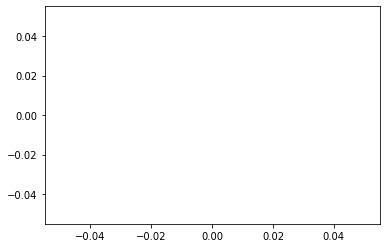

In [169]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()